In [1]:
from typing import Dict, List, Tuple

import numpy as np
import pandas as pd
from IPython.core.display import Markdown
from IPython.core.display_functions import display
import seaborn as sns

import notebooks.config as config
import notebooks.utils as nb_utils
from src.config import FeaturesInfo
from src.features.multivariate_analysis import MACleaner
from src.utils import preprocess_init
import matplotlib.pyplot as plt


STAGE = 2
PREVIOUS_STAGE = STAGE - 1

%load_ext autoreload
%autoreload 2

## Load cleaned data and metadata from artifacts

In [2]:
def load_dataset_and_metadata() -> (
    Tuple[pd.DataFrame, FeaturesInfo, Dict[str, List[str]], List[int]]
):
    df, features_info, cols_nan_strategy, idx_to_remove = (
        nb_utils.load_dataset_and_metadata(
            nb_utils.STAGES_DICT[PREVIOUS_STAGE]["name"],
            nb_utils.STAGES_DICT[PREVIOUS_STAGE]["folder_path"],
        )
    )
    return df, features_info, cols_nan_strategy, idx_to_remove

In [3]:
df, features_info, cols_nan_strategy, idx_to_remove = load_dataset_and_metadata()

## Multivariate Analysis

### Irregular label rows

In [4]:
@preprocess_init
def ma_irregular_label_rows_nb(
    df: pd.DataFrame,
    features_info: FeaturesInfo,
    cols_nan_strategy: Dict[str, List[str]],
    idx_to_remove: List[int],
) -> Tuple[pd.DataFrame, FeaturesInfo, Dict[str, List[str]], List[int]]:

    print("Cars that contain 'ucesc' or 'učešć' in the 'name' column")
    no_price_cond = df["name"].str.contains("ucesc|učešć", case=False)
    display(
        df.loc[no_price_cond, ["name", "short_url", "ai_installment_amount", "price"]]
    )
    print()

    display(
        Markdown("It can be seen that some cars had value of price, but some didn't.")
    )
    print()

    print("Cars where 'price' = 'ai_installment_amount'")
    df_cars_equal_price_install_amt = df.loc[
        df[config.LABEL] == df.ai_installment_amount, :
    ]
    display(df_cars_equal_price_install_amt)
    print()

    df.drop(df_cars_equal_price_install_amt.index, axis=0, inplace=True)
    print("Removed cars where 'price' = 'ai_installment_amount'")

    idx_to_remove.extend(df_cars_equal_price_install_amt.index.tolist())

    return df, features_info, cols_nan_strategy, idx_to_remove

In [5]:
df, features_info, cols_nan_strategy, idx_to_remove = ma_irregular_label_rows_nb(
    df=df,
    features_info=features_info,
    cols_nan_strategy=cols_nan_strategy,
    idx_to_remove=idx_to_remove,
)

Cars that contain 'ucesc' or 'učešć' in the 'name' column


,name,short_url,ai_installment_amount,price
id,,,,
22681846,Renault Scenic RATA 114e BEZ UČEŠĆA,https://www.polovniautomobili.com/auto-oglasi/...,114,114
22681838,BMW X1 RATA 222e BEZ UČEŠĆA,https://www.polovniautomobili.com/auto-oglasi/...,222,222
22903371,BMW 420 RATA 426e BEZ UČEŠĆA,https://www.polovniautomobili.com/auto-oglasi/...,426,19499
22903376,Škoda Superb RATA 171e BEZ UČEŠĆA,https://www.polovniautomobili.com/auto-oglasi/...,171,171
23172948,Nissan Qashqai KREDlTl BEZ UCESCA,https://www.polovniautomobili.com/auto-oglasi/...,150,8450
22969571,BMW 318 RATA 130e BEZ UCESCA,https://www.polovniautomobili.com/auto-oglasi/...,130,130
23099826,Audi A4 RATA 171e BEZ UCESCA,https://www.polovniautomobili.com/auto-oglasi/...,171,171
22681938,Volkswagen Golf 5 RATA 107e BEZ UČEŠĆA,https://www.polovniautomobili.com/auto-oglasi/...,107,107
22681931,Fiat EVO RATA 107e BEZ UČEŠĆA,https://www.polovniautomobili.com/auto-oglasi/...,107,107


It can be seen that some cars had value of price, but some didn't.


Cars where 'price' = 'ai_installment_amount'


,name,short_url,price,listing_followers_no,location,images_no,description,gi_brand,gi_model,gi_production_year,...,o_Garažiran,o_Kupljen_nov_u_Srbiji,o_Oldtimer,o_Prilagođeno_invalidima,o_Prvi_vlasnik,o_Restauriran,o_Rezervni_ključ,o_Servisna_knjiga,o_Test_vozilo,o_Tuning
id,,,,,,,,,,,,,,,,,,,,,
22681846,Renault Scenic RATA 114e BEZ UČEŠĆA,https://www.polovniautomobili.com/auto-oglasi/...,114,8,Beograd,23,................................DOBRODOSLI U A...,Renault,Scenic,2010,...,False,False,False,False,False,False,False,False,False,False
22681838,BMW X1 RATA 222e BEZ UČEŠĆA,https://www.polovniautomobili.com/auto-oglasi/...,222,22,Beograd,44,................................DOBRODOSLI U A...,BMW,X1,2011,...,False,False,False,False,False,False,False,False,False,False
22903376,Škoda Superb RATA 171e BEZ UČEŠĆA,https://www.polovniautomobili.com/auto-oglasi/...,171,7,Beograd,29,................................DOBRODOSLI U A...,Škoda,Superb,2010,...,False,False,False,False,False,False,False,False,False,False
22969571,BMW 318 RATA 130e BEZ UCESCA,https://www.polovniautomobili.com/auto-oglasi/...,130,2,Beograd,8,VOZILO U DOLASKU,BMW,318,2011,...,False,False,False,False,False,False,False,False,False,False
23099826,Audi A4 RATA 171e BEZ UCESCA,https://www.polovniautomobili.com/auto-oglasi/...,171,5,Beograd,33,...................DOBRODOSLI U AUTO PLAC VULI...,Audi,A4,2008,...,True,False,False,False,True,False,False,False,False,False
22681938,Volkswagen Golf 5 RATA 107e BEZ UČEŠĆA,https://www.polovniautomobili.com/auto-oglasi/...,107,26,Beograd,30,................................DOBRODOSLI U A...,Volkswagen,Golf 5,2006,...,False,False,False,False,False,False,False,False,False,False
22681931,Fiat EVO RATA 107e BEZ UČEŠĆA,https://www.polovniautomobili.com/auto-oglasi/...,107,15,Beograd,32,................................DOBRODOSLI U A...,Fiat,EVO,2011,...,False,False,False,False,False,False,False,False,False,False
21787916,Fiat Grande Punto 104e RATA BEZ UCESCA,https://www.polovniautomobili.com/auto-oglasi/...,104,54,Beograd,27,................................DOBRODOSLI U A...,Fiat,Grande Punto,2011,...,False,False,False,False,False,False,False,False,False,False
22898494,Škoda Superb RATA 314e BEZ UCESCA,https://www.polovniautomobili.com/auto-oglasi/...,314,28,Beograd,48,................................DOBRODOSLI U A...,Škoda,Superb,2017,...,False,False,False,False,False,False,False,False,False,False



Removed cars where 'price' = 'ai_installment_amount'


### Clean low kilometerage cars

In [6]:
@preprocess_init
def ma_low_kilometerage_cars_nb(
    df: pd.DataFrame,
    features_info: FeaturesInfo,
    cols_nan_strategy: Dict[str, List[str]],
    idx_to_remove: List[int],
) -> Tuple[pd.DataFrame, FeaturesInfo, Dict[str, List[str]], List[int]]:

    low_kilometerage_amount = 500
    print(f"Cars where 'gi_kilometerage' < {low_kilometerage_amount}")
    low_kilometerage_cars = df.loc[
        df["gi_kilometerage"] < low_kilometerage_amount,
        ["name", "short_url", "price", "gi_kilometerage"],
    ]
    display(low_kilometerage_cars)
    print()

    df.drop(low_kilometerage_cars.index, axis=0, inplace=True)
    print(f"Dropped cars where 'gi_kilometerage' < {low_kilometerage_amount}")

    idx_to_remove.extend(low_kilometerage_cars.index.tolist())

    return df, features_info, cols_nan_strategy, idx_to_remove

In [7]:
df, features_info, cols_nan_strategy, idx_to_remove = ma_low_kilometerage_cars_nb(
    df=df,
    features_info=features_info,
    cols_nan_strategy=cols_nan_strategy,
    idx_to_remove=idx_to_remove,
)

Cars where 'gi_kilometerage' < 500


,name,short_url,price,gi_kilometerage
id,,,,
18764867,BMW X3 2.0xDrive LCI,https://www.polovniautomobili.com/auto-oglasi/...,68350,2
22918835,Toyota Aygo X,https://www.polovniautomobili.com/auto-oglasi/...,15290,130
22479960,Dacia Duster 1.5 dci n1 expresion,https://www.polovniautomobili.com/auto-oglasi/...,22000,3
22327387,Opel Crossland X ///nov///,https://www.polovniautomobili.com/auto-oglasi/...,18999,25
23213165,Fiat 500 1.0 Dolcevita Hybrid,https://www.polovniautomobili.com/auto-oglasi/...,15499,6
21693713,Renault Megane Equilibre 115dci,https://www.polovniautomobili.com/auto-oglasi/...,21950,11
23200938,Great Wall POER,https://www.polovniautomobili.com/auto-oglasi/...,28800,5
21996306,BMW 520 d xDrive 2023,https://www.polovniautomobili.com/auto-oglasi/...,78990,2
21996178,BMW 520 xDrive 2024,https://www.polovniautomobili.com/auto-oglasi/...,77990,2



Dropped cars where 'gi_kilometerage' < 500


### High seats cars

In [8]:
@preprocess_init
def ma_high_seats_cars_nb(
    df: pd.DataFrame,
    features_info: FeaturesInfo,
    cols_nan_strategy: Dict[str, List[str]],
    idx_to_remove: List[int],
) -> Tuple[pd.DataFrame, FeaturesInfo, Dict[str, List[str]], List[int]]:

    high_seats_no = 5
    high_seats = df.loc[df.ai_seats_no > high_seats_no, ["name", "ai_seats_no"]]

    print("Frequencies of 'ai_seats_no' of extreme high number of seats cars")
    display(high_seats.ai_seats_no.value_counts())
    print()

    extreme_high_seats_no = 7
    print(f"Cars where 'ai_seats_no' > {extreme_high_seats_no}")
    more_than_7_seats = high_seats[high_seats.ai_seats_no > extreme_high_seats_no]
    display(more_than_7_seats)
    print()

    df.drop(more_than_7_seats.index, axis=0, inplace=True)
    print(f"Dropped cars where 'ai_seats_no' > {extreme_high_seats_no}")

    idx_to_remove.extend(more_than_7_seats.index.tolist())

    return df, features_info, cols_nan_strategy, idx_to_remove

In [9]:
df, features_info, cols_nan_strategy, idx_to_remove = ma_high_seats_cars_nb(
    df=df,
    features_info=features_info,
    cols_nan_strategy=cols_nan_strategy,
    idx_to_remove=idx_to_remove,
)

Frequencies of 'ai_seats_no' of extreme high number of seats cars


ai_seats_no
7    735
6     42
8     13
9      7
Name: count, dtype: Int64


Cars where 'ai_seats_no' > 7


,name,ai_seats_no
id,,
22681822,Toyota Land Cruiser,8
15786162,Toyota Land Cruiser,8
12665476,Lincoln Town car STRETCHLIMO,8
22503186,Toyota Land Cruiser PRADO,8
23222567,Mercedes Benz V Klasa E.XTRA LONG,8
23178101,Opel 1.5 D,9
20229898,Ford Tourneo Connect 8 SEDISTA,8
22914575,Fiat Scudo MAXI/LONG/9sed,9
23228117,Volkswagen Multivan,9



Dropped cars where 'ai_seats_no' > 7


### Oldtimers

In [10]:
@preprocess_init
def ma_oldtimers_nb(
    df: pd.DataFrame,
    features_info: FeaturesInfo,
    cols_nan_strategy: Dict[str, List[str]],
    idx_to_remove: List[int],
) -> Tuple[pd.DataFrame, FeaturesInfo, Dict[str, List[str]], List[int]]:
    oldtimers = df.loc[
        df.o_Oldtimer,
        [
            "name",
            "gi_production_year",
            "price",
            "short_url",
            "gi_kilometerage",
            "gi_engine_capacity",
            "gi_engine_power",
            "ai_seats_no",
            "o_Restauriran",
        ],
    ]

    oldtimers_pairplot = sns.pairplot(data=oldtimers.drop(columns=["o_Restauriran"]))
    plt.close()
    print("Oldtimers pairplot")
    display(oldtimers_pairplot.figure)
    print()

    seats_no = 2
    print(f"Oldtimer cars with 'ai_seats_no' = {seats_no}")
    oldtimer_2_seats = oldtimers[oldtimers.ai_seats_no == seats_no]
    display(oldtimer_2_seats)
    print()

    df.drop(oldtimer_2_seats.index, inplace=True)
    print(f"Dropped oldtimer cars with 'ai_seats_no' = {seats_no}")
    print()

    idx_to_remove.extend(oldtimer_2_seats.index.tolist())

    oldtimers.drop(oldtimer_2_seats.index, inplace=True)

    ot_production_year = 2000
    print(f"Oldtimers produced before year {ot_production_year}")
    nb_utils.show_hist_box_numerical_col(
        oldtimers[oldtimers.gi_production_year < ot_production_year],
        "gi_production_year",
    )

    return df, features_info, cols_nan_strategy, idx_to_remove

Oldtimers pairplot


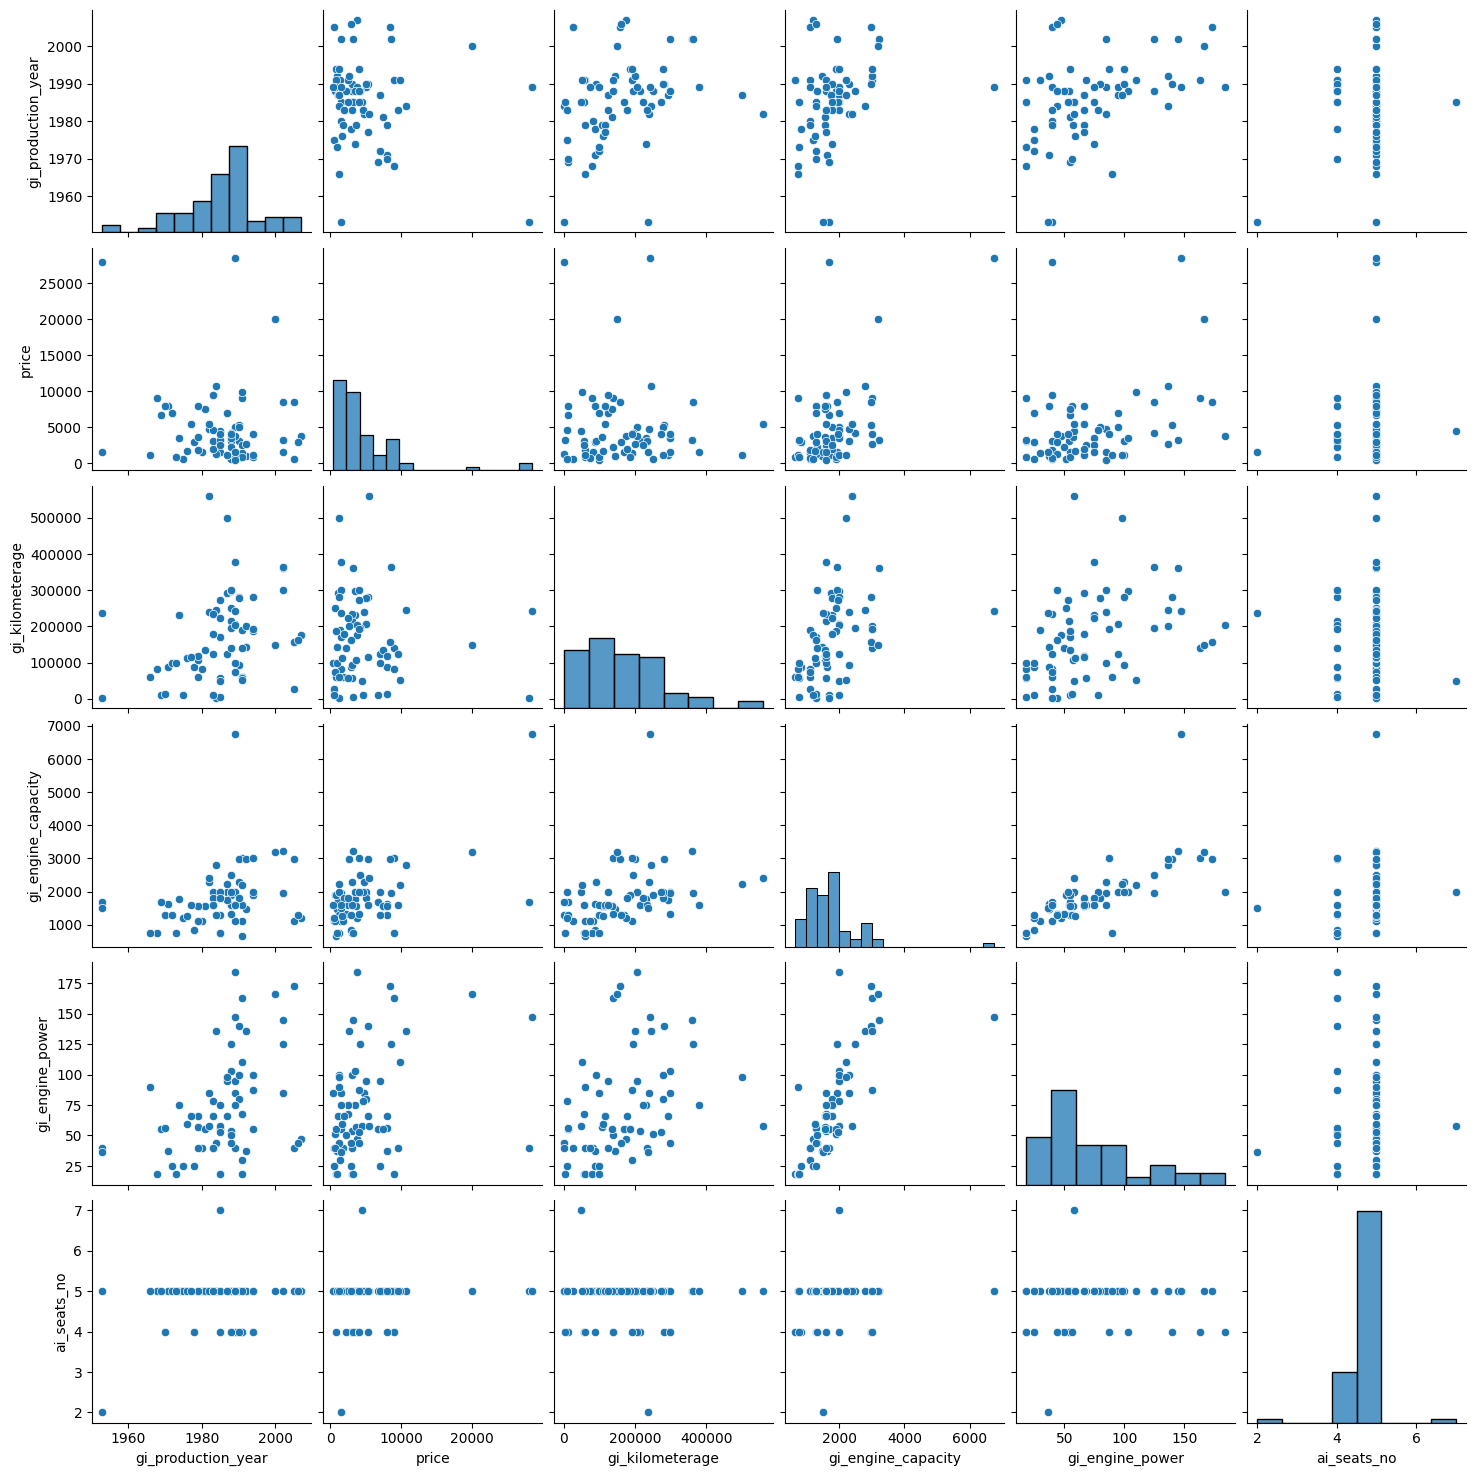


Oldtimer cars with 'ai_seats_no' = 2


,name,gi_production_year,price,short_url,gi_kilometerage,gi_engine_capacity,gi_engine_power,ai_seats_no,o_Restauriran
id,,,,,,,,,
23205081,Jeep Willys,1953,1600,https://www.polovniautomobili.com/auto-oglasi/...,235687,1500,36,2,False



Dropped oldtimer cars with 'ai_seats_no' = 2

Oldtimers produced before year 2000
Univariate analysis of 'gi_production_year' column
Histogram and box plot


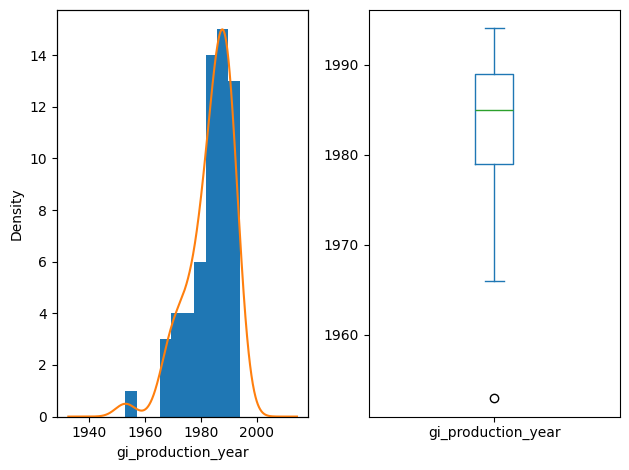

Descriptive statistics


count           60.0
mean     1983.466667
std         8.110396
min           1953.0
25%           1979.0
50%           1985.0
75%           1989.0
max           1994.0
Name: gi_production_year, dtype: Float64

Variance: 0.0040890006456657845
Skewness: -1.2992677851046495
Kurtosis: 1.9400654848883008

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [11]:
df, features_info, cols_nan_strategy, idx_to_remove = ma_oldtimers_nb(
    df=df,
    features_info=features_info,
    cols_nan_strategy=cols_nan_strategy,
    idx_to_remove=idx_to_remove,
)

## Testing

### Test individual components

In [12]:
class TestNotebook:
    # Testing only df_train
    def test_ma_generic(self, function_name: str):
        df_1, features_info_1, cols_nan_strategy_1, idx_to_remove_1 = (
            load_dataset_and_metadata()
        )
        df_2, features_info_2, cols_nan_strategy_2, idx_to_remove_2 = (
            load_dataset_and_metadata()
        )

        func_name_ua = f"ma_{function_name}"
        func_name_nb = f"{func_name_ua}_nb"

        macleaner_obj = MACleaner(features_info_1, cols_nan_strategy_1, idx_to_remove_1)

        # Get function from class object from .py file
        func_ua = getattr(macleaner_obj, func_name_ua)
        # Get function defined in this notebook
        func_nb = globals()[func_name_nb]

        df_ua, features_info_ua, cols_nan_strategy_ua, idx_to_remove_ua = func_ua(
            df=df_1,
            features_info=features_info_1,
            cols_nan_strategy=cols_nan_strategy_1,
            idx_to_remove=idx_to_remove_1,
        )
        df_nb, features_info_nb, cols_nan_strategy_nb, idx_to_remove_nb = func_nb(
            df=df_2,
            features_info=features_info_2,
            cols_nan_strategy=cols_nan_strategy_2,
            idx_to_remove=idx_to_remove_2,
        )

        pd.testing.assert_frame_equal(df_ua, df_nb)
        assert features_info_ua == features_info_nb
        assert cols_nan_strategy_ua == cols_nan_strategy_nb
        assert idx_to_remove_ua == idx_to_remove_nb

        # Test features info for duplicates
        nb_utils.test_features_info_duplicates(features_info_nb)
        nb_utils.test_features_info_duplicates(features_info_ua)

        # Test columns nan strategy for duplicates
        nb_utils.test_cols_nan_strategy_duplicates(cols_nan_strategy_nb)
        nb_utils.test_cols_nan_strategy_duplicates(cols_nan_strategy_ua)

    def start(self):
        self.test_ma_generic("irregular_label_rows")
        self.test_ma_generic("low_kilometerage_cars")
        self.test_ma_generic("high_seats_cars")
        self.test_ma_generic("oldtimers")

In [ ]:
test_obj = TestNotebook()
test_obj.start()

### Test whole component

In [14]:
@preprocess_init
def test_whole_component(
    df: pd.DataFrame,
    features_info: FeaturesInfo,
    cols_nan_strategy: Dict[str, List[str]],
    idx_to_remove: List[int],
):
    df_init, features_info_init, cols_nan_stragegy_init, idx_to_remove_init = (
        load_dataset_and_metadata()
    )

    macleaner_obj = MACleaner(features_info_init, cols_nan_stragegy_init, idx_to_remove_init)

    df_ma = macleaner_obj.clean(df=df_init)
    features_info_ma = macleaner_obj.features_info
    cols_nan_strategy_ma = macleaner_obj.cols_nan_strategy
    idx_to_remove_ma = macleaner_obj.idx_to_remove

    pd.testing.assert_frame_equal(df, df_ma)
    assert features_info == features_info_ma
    assert cols_nan_strategy == cols_nan_strategy_ma
    assert idx_to_remove == idx_to_remove_ma

    # Test features info for duplicates
    nb_utils.test_features_info_duplicates(features_info)
    nb_utils.test_features_info_duplicates(features_info_ma)

    # Test features info with columns
    nb_utils.test_features_info_with_columns(df, features_info)
    nb_utils.test_features_info_with_columns(df_ma, features_info_ma)

    # Test columns nan strategy for duplicates
    nb_utils.test_cols_nan_strategy_duplicates(cols_nan_strategy)
    nb_utils.test_cols_nan_strategy_duplicates(cols_nan_strategy_ma)

    # Test columns nan strategy with features info
    nb_utils.test_cols_nan_strategy_with_features_info(cols_nan_strategy, features_info)
    nb_utils.test_cols_nan_strategy_with_features_info(
        cols_nan_strategy_ma, features_info_ma
    )

In [ ]:
test_whole_component(
    df=df,
    features_info=features_info,
    cols_nan_strategy=cols_nan_strategy,
    idx_to_remove=idx_to_remove
)